# **Dataset y tratamiento**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
labelencoder= LabelEncoder()
data['C']=labelencoder.fit_transform(data['C'])

In [ ]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [ ]:
#Cual es el tipo de los atributos?
data. dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hpw                int64
Country           object
C                  int64
dtype: object

In [ ]:
lista_categoricos = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
lista_numericos = ['Age', 'Fnlwgt','Education-num','Capital-gain','Capital-loss', 'Hpw']

In [ ]:
#porcentaje datos nulos en variables
(data.isnull().sum()/data.shape[0])*100

Age               0.000000
Workclass         5.638647
Fnlwgt            0.000000
Education         0.000000
Education-num     0.000000
Marital-status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital-gain      0.000000
Capital-loss      0.000000
Hpw               0.000000
Country           1.790486
C                 0.000000
dtype: float64

In [ ]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            583
C                    0
dtype: int64

In [ ]:
#reemplazar datos nulos en numericos por la media y en categoricos por la moda
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Workclass'].fillna(data['Workclass'].value_counts().index[0], inplace=True)
data['Fnlwgt'].fillna(data['Fnlwgt'].median(), inplace=True)
data['Education'].fillna(data['Education'].value_counts().index[0], inplace=True)
data['Education-num'].fillna(data['Education-num'].median(), inplace=True)
data['Marital-status'].fillna(data['Marital-status'].value_counts().index[0], inplace=True)
data['Occupation'].fillna(data['Occupation'].value_counts().index[0], inplace=True)
data['Relationship'].fillna(data['Relationship'].value_counts().index[0], inplace=True)
data['Race'].fillna(data['Race'].value_counts().index[0], inplace=True)
data['Capital-gain'].fillna(data['Capital-gain'].median(), inplace=True)
data['Capital-loss'].fillna(data['Capital-loss'].median(), inplace=True)
data['Hpw'].fillna(data['Hpw'].median(), inplace=True)
data['Country'].fillna(data['Country'].value_counts().index[0], inplace=True)

In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
print(data['C'].value_counts()) 

0    24720
1     7841
Name: C, dtype: int64


In [ ]:
'''
data['Workclass'] = encoder.fit_transform(data['Workclass']).toarray()
data['Education'] = encoder.fit_transform(data['Education']).toarray()
data['Marital-status'] = encoder.fit_transform(data['Marital-status']).toarray()
data['Occupation'] = encoder.fit_transform(data['Occupation']).toarray()
data['Relationship'] = encoder.fit_transform(data['Relationship']).toarray()
data['Race'] = encoder.fit_transform(data['Race']).toarray()
data['Sex'] = encoder.fit_transform(data['Sex']).toarray()
'''

"\ndata['Workclass'] = encoder.fit_transform(data['Workclass']).toarray()\ndata['Education'] = encoder.fit_transform(data['Education']).toarray()\ndata['Marital-status'] = encoder.fit_transform(data['Marital-status']).toarray()\ndata['Occupation'] = encoder.fit_transform(data['Occupation']).toarray()\ndata['Relationship'] = encoder.fit_transform(data['Relationship']).toarray()\ndata['Race'] = encoder.fit_transform(data['Race']).toarray()\ndata['Sex'] = encoder.fit_transform(data['Sex']).toarray()\n"

In [ ]:
'''
data['Workclass']=labelencoder.fit_transform(data['Workclass'])
data['Education']=labelencoder.fit_transform(data['Education'])
data['Marital-status']=labelencoder.fit_transform(data['Marital-status'])
data['Occupation']=labelencoder.fit_transform(data['Occupation'])
data['Relationship']=labelencoder.fit_transform(data['Relationship'])
data['Race']=labelencoder.fit_transform(data['Race'])
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Country']=labelencoder.fit_transform(data['Country'])
'''

"\ndata['Workclass']=labelencoder.fit_transform(data['Workclass'])\ndata['Education']=labelencoder.fit_transform(data['Education'])\ndata['Marital-status']=labelencoder.fit_transform(data['Marital-status'])\ndata['Occupation']=labelencoder.fit_transform(data['Occupation'])\ndata['Relationship']=labelencoder.fit_transform(data['Relationship'])\ndata['Race']=labelencoder.fit_transform(data['Race'])\ndata['Sex']=labelencoder.fit_transform(data['Sex'])\ndata['Country']=labelencoder.fit_transform(data['Country'])\n"

In [ ]:
'''
lista_categoricos = [data["Workclass"], data["Education"], data["Marital-status"], data["Occupation"], data["Relationship"], data["Race"], data["Sex"], data["Country"]] #categoricos ya codificados, encoder a los de tipo object
#print(lista_categoricos)
lista_fact = []
for e in lista_categoricos:
  aux, _ = pd.factorize(e)
  lista_fact.append(aux)
print(lista_fact)
'''

'\nlista_categoricos = [data["Workclass"], data["Education"], data["Marital-status"], data["Occupation"], data["Relationship"], data["Race"], data["Sex"], data["Country"]] #categoricos ya codificados, encoder a los de tipo object\n#print(lista_categoricos)\nlista_fact = []\nfor e in lista_categoricos:\n  aux, _ = pd.factorize(e)\n  lista_fact.append(aux)\nprint(lista_fact)\n'

In [ ]:
'''
data["Workclass"] = lista_fact[0]
data["Education"] = lista_fact[1]
data["Marital-status"] = lista_fact[2]
data["Occupation"] = lista_fact[3]
data["Relationship"] = lista_fact[4]
data["Race"] = lista_fact[5]
data["Sex"] = lista_fact[6]
data["Country"] = lista_fact[7]
'''

'\ndata["Workclass"] = lista_fact[0]\ndata["Education"] = lista_fact[1]\ndata["Marital-status"] = lista_fact[2]\ndata["Occupation"] = lista_fact[3]\ndata["Relationship"] = lista_fact[4]\ndata["Race"] = lista_fact[5]\ndata["Sex"] = lista_fact[6]\ndata["Country"] = lista_fact[7]\n'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
lista_categoricos = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
lista_numericos = ['Age', 'Fnlwgt','Education-num','Capital-gain','Capital-loss', 'Hpw']
scaler = MinMaxScaler()
#scaler = StandardScaler()
#transformer = RobustScaler().fit(data.drop(['C'], 1))
#transformer = MaxAbsScaler().fit(data.drop(['C'], 1))
newData = data.drop(['C'], 1)
newData[lista_numericos] = scaler.fit_transform(newData[lista_numericos])
#newData['Fnlwgt'] = scaler.fit_transform(newData['Fnlwgt'])
#newData['Education-num'] = scaler.fit_transform(newData['Education-num'])
#newData['Capital-gain'] = scaler.fit_transform(['Capital-gain'])
#newData['Capital-loss'] = scaler.fit_transform(['Capital-loss'])
#newData['Hpw'] = scaler.fit_transform(newData['Hpw'])
#for i in lista_numericos:
print(newData)
#  newData[i] = scaler.fit_transform(newData)
#newData = scaler.fit_transform(data.drop(['C'], 1))
#newData = transformer.transform(data.drop(['C'], 1))


            Age          Workclass    Fnlwgt    Education  Education-num  \
0      0.301370          State-gov  0.044302    Bachelors       0.800000   
1      0.452055   Self-emp-not-inc  0.048238    Bachelors       0.800000   
2      0.287671            Private  0.138113      HS-grad       0.533333   
3      0.493151            Private  0.151068         11th       0.400000   
4      0.150685            Private  0.221488    Bachelors       0.800000   
...         ...                ...       ...          ...            ...   
32556  0.136986            Private  0.166404   Assoc-acdm       0.733333   
32557  0.315068            Private  0.096500      HS-grad       0.533333   
32558  0.561644            Private  0.094827      HS-grad       0.533333   
32559  0.068493            Private  0.128499      HS-grad       0.533333   
32560  0.479452       Self-emp-inc  0.187203      HS-grad       0.533333   

            Marital-status          Occupation    Relationship    Race  \
0            

<ipython-input-14-f0f9bea2b611>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  newData = data.drop(['C'], 1)


In [ ]:
def encode_data(data, categorical_data):
    encoded_data = pd.get_dummies(data, columns = categorical_data)
    cat_columns = encoded_data.select_dtypes(['object']).columns
    encoded_data[cat_columns] = encoded_data[cat_columns].apply(lambda x: pd.factorize(x)[0])
    return encoded_data

list_n = encode_data(newData,lista_categoricos)

In [ ]:
#lista_categoricos = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
#lista_numericos = ['Age', 'Fnlwgt','Education-num','Capital-gain','Capital-loss', 'Hpw']
newData = newData.drop(['Workclass'], 1)
newData = newData.drop(['Education'], 1)
newData = newData.drop(['Marital-status'], 1)
newData = newData.drop(['Occupation'], 1)
newData = newData.drop(['Relationship'], 1)
newData = newData.drop(['Race'], 1)
newData = newData.drop(['Sex'], 1)
newData = newData.drop(['Country'], 1)
print(newData)

            Age    Fnlwgt  Education-num  Capital-gain  Capital-loss       Hpw
0      0.301370  0.044302       0.800000      0.021740           0.0  0.397959
1      0.452055  0.048238       0.800000      0.000000           0.0  0.122449
2      0.287671  0.138113       0.533333      0.000000           0.0  0.397959
3      0.493151  0.151068       0.400000      0.000000           0.0  0.397959
4      0.150685  0.221488       0.800000      0.000000           0.0  0.397959
...         ...       ...            ...           ...           ...       ...
32556  0.136986  0.166404       0.733333      0.000000           0.0  0.377551
32557  0.315068  0.096500       0.533333      0.000000           0.0  0.397959
32558  0.561644  0.094827       0.533333      0.000000           0.0  0.397959
32559  0.068493  0.128499       0.533333      0.000000           0.0  0.193878
32560  0.479452  0.187203       0.533333      0.150242           0.0  0.397959

[32561 rows x 6 columns]


<ipython-input-16-2b7c32b3fe88>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  newData = newData.drop(['Workclass'], 1)
<ipython-input-16-2b7c32b3fe88>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  newData = newData.drop(['Education'], 1)
<ipython-input-16-2b7c32b3fe88>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  newData = newData.drop(['Marital-status'], 1)
<ipython-input-16-2b7c32b3fe88>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  newData = newData.drop(['Occupation'], 1)
<ipython-input-16-2b7c32b3fe88>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

In [ ]:
newData = pd.concat([newData,list_n] , axis = 1)

In [ ]:
#lista_categoricos = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
'''
newData['Workclass'], uniques = pd.factorize(newData['Workclass'])
newData['Education'], uniques = pd.factorize(newData['Education'])
newData['Marital-status'], uniques = pd.factorize(newData['Marital-status'])
newData['Occupation'], uniques = pd.factorize(newData['Occupation'])
newData['Relationship'], uniques = pd.factorize(newData['Relationship'])
newData['Race'], uniques = pd.factorize(newData['Race'])
newData['Sex'], uniques = pd.factorize(newData['Sex'])
newData['Country'], uniques = pd.factorize(newData['Country'])

sex_cat = pd.get_dummies(titanic[["sex", "embarked"]])
sex_cat.head()

'''
#wk = pd.get_dummies(newData['Workclass'])
'''
newData['Education'] = pd.get_dummies('Education')
newData['Marital-status'] = pd.get_dummies('Marital-status')
newData['Occupation'] = pd.get_dummies('Occupation')
newData['Relationship'] = pd.get_dummies('Relationship')
newData['Race'] = pd.get_dummies('Race')
newData['Sex'] = pd.get_dummies('Sex')
newData['Country'] = pd.get_dummies('Country')
'''

"\nnewData['Education'] = pd.get_dummies('Education')\nnewData['Marital-status'] = pd.get_dummies('Marital-status')\nnewData['Occupation'] = pd.get_dummies('Occupation')\nnewData['Relationship'] = pd.get_dummies('Relationship')\nnewData['Race'] = pd.get_dummies('Race')\nnewData['Sex'] = pd.get_dummies('Sex')\nnewData['Country'] = pd.get_dummies('Country')\n"

In [ ]:
print(newData)

            Age    Fnlwgt  Education-num  Capital-gain  Capital-loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404       0.733333      0.000000           0.0   
32557  0.315068  0.096500       0.533333      0.000000           0.0   
32558  0.561644  0.094827       0.533333      0.000000           0.0   
32559  0.068493  0.128499       0.533333      0.000000           0.0   
32560  0.479452  0.187203       0.533333      0.150242           0.0   

            Hpw       Age    Fnlwgt  Education-num  Capital-gain  ...  \
0      0.397959  0.301370  0.044302       0.800000      0.0217

# **Definicion de datos para el modelo**


In [ ]:
X = np.array(newData)
y = np.array(data['C'])

In [ ]:
print('X:',X)
print('y:',y)

X: [[0.30136986 0.0443019  0.8        ... 1.         0.         0.        ]
 [0.45205479 0.0482376  0.8        ... 1.         0.         0.        ]
 [0.28767123 0.13811345 0.53333333 ... 1.         0.         0.        ]
 ...
 [0.56164384 0.09482688 0.53333333 ... 1.         0.         0.        ]
 [0.06849315 0.12849934 0.53333333 ... 1.         0.         0.        ]
 [0.47945205 0.18720338 0.53333333 ... 1.         0.         0.        ]]
y: [0 0 0 ... 0 0 1]


In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

# **Regresion logistica con balanceo en el dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
#clf = LogisticRegression(class_weight="balanced")
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    return clf


In [ ]:
model = run_model_balanced(X_train, X_validation, Y_train, Y_validation)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
nm = NearMiss()
dataRus, targetRus = rus.fit_resample(X, y)
print(len(dataRus))
print(len(targetRus))
validation_size = 0.20
seed = 7
X_train2, X_validation2, Y_train2, Y_validation2 = train_test_split(dataRus, targetRus, test_size=validation_size, random_state=seed)

model = run_model_balanced(X_train2, X_validation2, Y_train2, Y_validation2)

predictions = model.predict(X_validation2)
print(f1_score(Y_validation2, predictions))

print(classification_report(Y_validation2, predictions))

15682
15682
0.8351846292404683
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1525
           1       0.81      0.86      0.84      1612

    accuracy                           0.82      3137
   macro avg       0.83      0.82      0.82      3137
weighted avg       0.83      0.82      0.82      3137



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

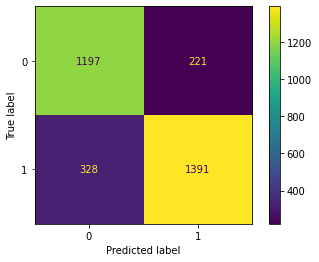

In [ ]:
cm = metrics.confusion_matrix(predictions,Y_validation2)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# **KNN K=5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train2, Y_train2)


KNeighborsClassifier()

In [ ]:
predict = knn.predict(X_validation2)

In [ ]:
print(f1_score(Y_validation2, predict))
print(classification_report(Y_validation2, predict))

0.8099022004889976
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1525
           1       0.80      0.82      0.81      1612

    accuracy                           0.80      3137
   macro avg       0.80      0.80      0.80      3137
weighted avg       0.80      0.80      0.80      3137



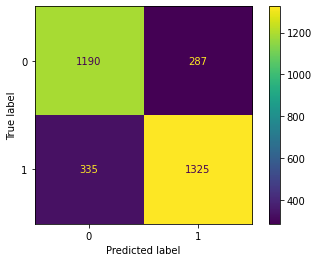

In [ ]:
cm = metrics.confusion_matrix(predict,Y_validation2)
disp2 = ConfusionMatrixDisplay(cm)
disp2.plot()

# **Discriminante lineal**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train2, Y_train2)

LinearDiscriminantAnalysis()

In [ ]:
predict2 = clf.predict(X_validation2)

In [ ]:
print(f1_score(Y_validation2, predict2))
print(classification_report(Y_validation2, predict2))

0.8198757763975156
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1525
           1       0.78      0.86      0.82      1612

    accuracy                           0.81      3137
   macro avg       0.81      0.80      0.80      3137
weighted avg       0.81      0.81      0.81      3137



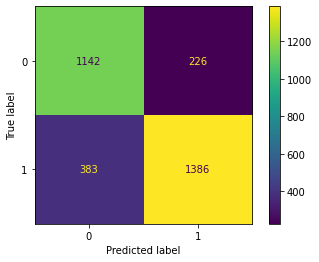

In [ ]:
cm = metrics.confusion_matrix(predict2,Y_validation2)
disp3 = ConfusionMatrixDisplay(cm)
disp3.plot()

# **QDA**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model5 = QuadraticDiscriminantAnalysis()
model5.fit(X_train2, Y_train2)
predict5 = clf.predict(X_validation2)
print(f1_score(Y_validation2, predict5))
print(classification_report(Y_validation2, predict5))

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8198757763975156
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1525
           1       0.78      0.86      0.82      1612

    accuracy                           0.81      3137
   macro avg       0.81      0.80      0.80      3137
weighted avg       0.81      0.81      0.81      3137



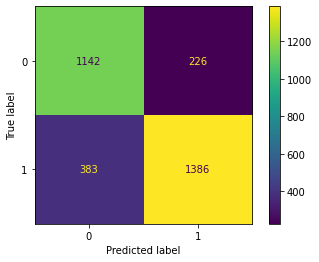

In [ ]:
cm = metrics.confusion_matrix(predict5,Y_validation2)
disp4 = ConfusionMatrixDisplay(cm)
disp4.plot()

# **SVM**

In [ ]:
from sklearn.svm import SVC
modelo = SVC()
modelo.fit(X_train2, Y_train2)

SVC()

In [ ]:
predicciones = modelo.predict(X_validation2)
print(f1_score(Y_validation2, predicciones))
print(classification_report(Y_validation2, predicciones))

0.8160475482912333
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1525
           1       0.78      0.85      0.82      1612

    accuracy                           0.80      3137
   macro avg       0.81      0.80      0.80      3137
weighted avg       0.80      0.80      0.80      3137



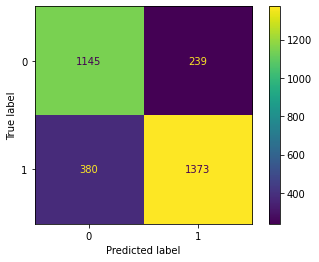

In [ ]:
cm = metrics.confusion_matrix(predicciones,Y_validation2)
disp4 = ConfusionMatrixDisplay(cm)
disp4.plot()